<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 7043 non-null   object 
 1   internet_service_type_id    7043 non-null   int64  
 2   contract_type_id            7043 non-null   int64  
 3   gender                      7043 non-null   object 
 4   senior_citizen              7043 non-null   int64  
 5   partner                     7043 non-null   object 
 6   dependents                  7043 non-null   object 
 7   tenure                      7043 non-null   int64  
 8   phone_service               7043 non-null   object 
 9   multiple_lines              7043 non-null   object 
 10  online_security             7043 non-null   object 
 11  online_backup               7043 non-null   object 
 12  device_protection           7043 non-null   object 
 13  tech_support                7043 

Accuracy of Decision Tree classifier on training set: 0.80
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      3130
           1       0.71      0.38      0.50      1095

    accuracy                           0.80      4225
   macro avg       0.76      0.66      0.69      4225
weighted avg       0.79      0.80      0.78      4225

accuracy is: 0.7990532544378698 Ture Positive Rate is: 0.4136986301369863 False Positive Rate is: 0.06613418530351438 /n True Negative Rate is: 0.9338658146964857 False Negative Rate is: 0.5863013698630137 precision is: 0.6863636363636364 /n f1_score is: 0.5162393162393163 support_pos is: 1095 support_neg is: 3130
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      3130
           1       0.71      0.38      0.50      1095

    accuracy                           0.80      4225
   macro avg       0.76      0.66      0.69      4225
weighted avg       0.79   

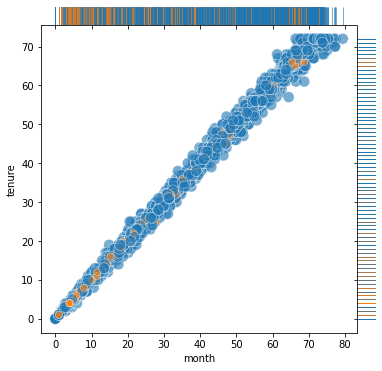

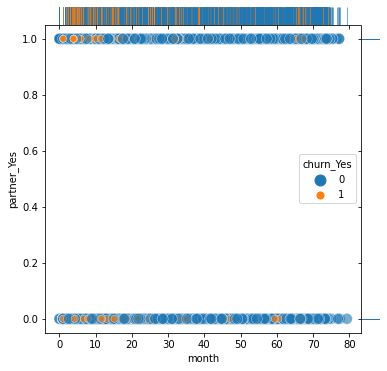

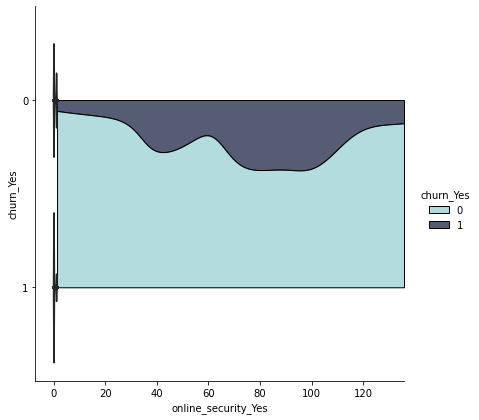

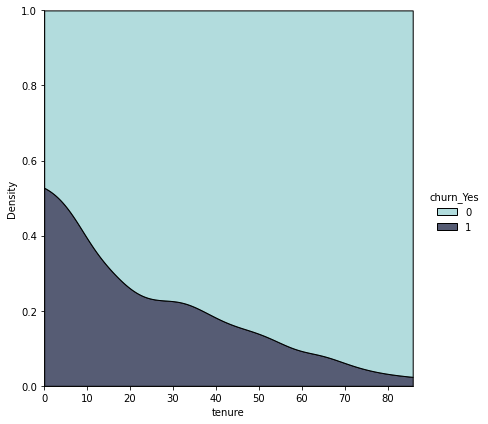

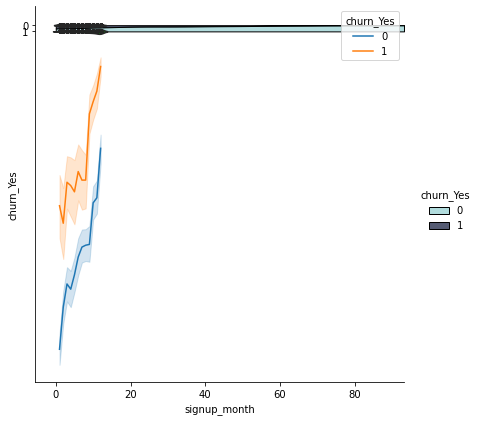

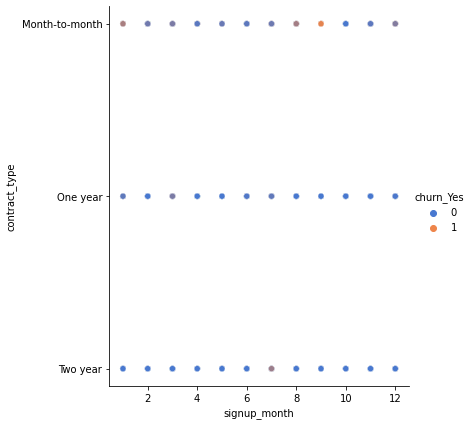

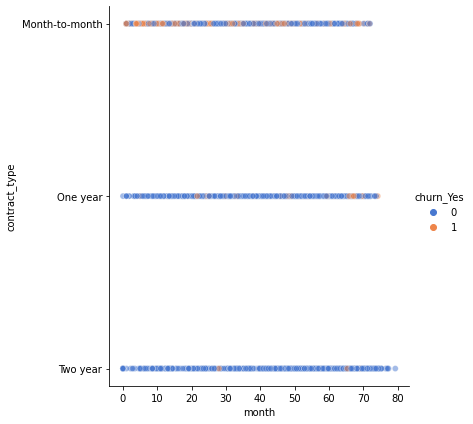

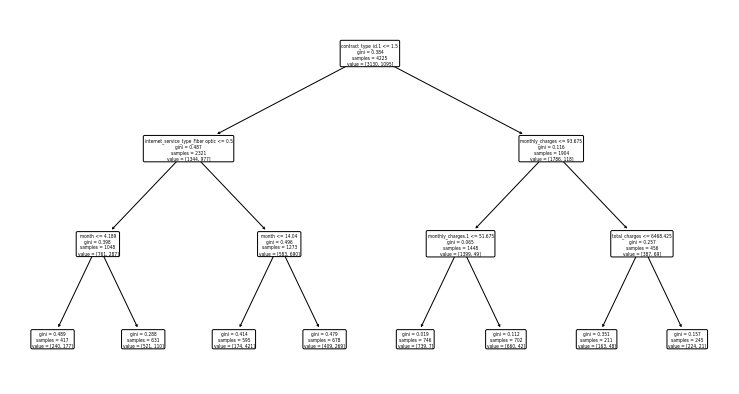

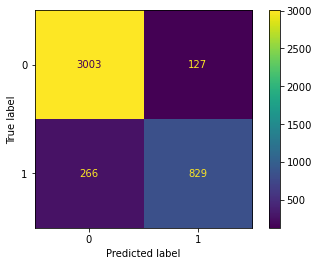

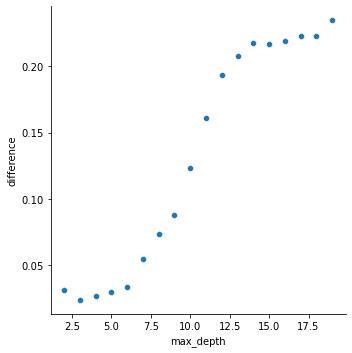

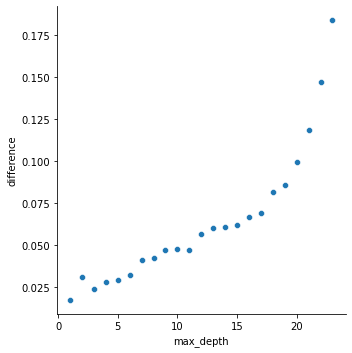

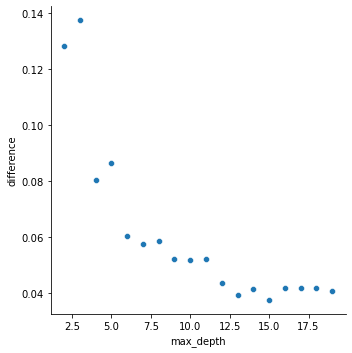

In [1]:
# Import functions
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
# ignore warnings
import warnings 
warnings.filterwarnings("ignore")
# import sklearn for classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
# import self build functions
import env
import acquire
import prepare
import exp_mod
import report_wdate
import report_before_the_report

# Project Planning
    - Create .ignore file and setting up the environment to ensure no sensitive information is publish to the    public.
    - Create two .py functions that contain acquire, prepare, and split the data.
    - Create inital notebook to test out and explore data. Create some functions in that notebook to import the work to the final notebook.
    - Create a README.md with all information required.
    - In final notebook, we will import those best models.
    - Create a final csv file for the test prediction.
    - Document the conclusion, takeaway, and next steps in the Final notebook.

# Executive Summary- Conclusions and Next Steps
    - All of the classification models [LogisticRegression, DecisionTree, RandomForest, and KNeighbors predicted] has similar accuracy (around 76%-82%)
    - The random forest model was used due to it has the best outcome with 81% accuracy in train dataset.
    - The exploration revealed that people are likely to sign up the service in December with month to month contract, and after one month, 61% of them will churn.
    - The exploration also revealed that the next steps we should implement is to gather more data on what is the motive those people decided to sign up in December and how many features they have included in their service.
    - The exploration revealed that customers are like to churn in December when they have less than 4 features.

# Object
The object for this project is why customers are churing while we dont want them churh.

# Acquire Data

In [2]:
# gather the data via a function
telco_df=acquire.get_telco_data()
# set telco_df from acquire.py document
telco_df

,customer_id,internet_service_type_id,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,device_protection.1,tech_support.1,streaming_tv.1,streaming_movies.1,contract_type_id.1,paperless_billing.1,payment_type_id.1,monthly_charges.1,total_charges.1,signup_date
0,0002-ORFBO,1,2,Female,0,Yes,Yes,9,Yes,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,2021-04-21 18:07:34
1,0003-MKNFE,1,1,Male,0,No,No,9,Yes,Yes,...,No,No,No,Yes,1,No,2,59.90,542.4,2021-04-21 18:07:34
2,0004-TLHLJ,2,1,Male,0,No,No,4,Yes,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,2021-09-21 18:07:34
3,0011-IGKFF,2,1,Male,1,Yes,No,13,Yes,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,2020-12-21 18:07:34
4,0013-EXCHZ,2,1,Female,1,Yes,No,3,Yes,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,2021-10-21 18:07:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9282-IZGQK,2,1,Female,0,No,No,1,Yes,Yes,...,No,No,No,Yes,1,Yes,1,85.00,85,2021-12-21 18:07:34
7039,9462-MJUAW,1,1,Male,0,No,No,4,Yes,Yes,...,No,No,No,No,1,No,2,50.40,206.6,2021-09-21 18:07:34
7040,9705-ZJBCG,1,2,Female,0,Yes,Yes,13,Yes,No,...,No,Yes,No,No,2,No,3,54.15,701.05,2020-12-21 18:07:34
7041,9777-IQHWP,2,3,Male,0,Yes,Yes,64,Yes,Yes,...,Yes,No,No,Yes,3,No,3,93.40,5822.3,2016-09-21 18:07:34


In [3]:
# retrive basic information about the dataframe
report_before_the_report.initial_data(telco_df)

this data frame has 7043 rows and 38 columns
                        
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 7043 non-null   object 
 1   internet_service_type_id    7043 non-null   int64  
 2   contract_type_id            7043 non-null   int64  
 3   gender                      7043 non-null   object 
 4   senior_citizen              7043 non-null   int64  
 5   partner                     7043 non-null   object 
 6   dependents                  7043 non-null   object 
 7   tenure                      7043 non-null   int64  
 8   phone_service               7043 non-null   object 
 9   multiple_lines              7043 non-null   object 
 10  online_security             7043 non-null   object 
 11  online_backup               7043 non-null   object 
 12  device_protection   

# Acquire Key Takeaways
    There are 7043 rows.
    The total_charges and the monthly charges can help us find out how many days that customers stayed before the decided to churn.
    There are non-null in all data columns
    There are 38 columns, but we need to drop some duplicates.

# Prepare the data

In [4]:
# the prepare.py and split.py will have all those functions needed to prepare and split the dataframe
prep_telco=prepare.prep_telco(telco_df)
prep_telco
# setting the prepared telco dataframe to prep_telco, and the dataframe returns 43 columns after prepared.

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,contract_type,phone_service.1,multiple_lines.1,internet_service_type_id.1,online_security.1,...,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,gender_Male
0,0002-ORFBO,0,9,65.60,593.30,One year,Yes,No,1,No,...,1,0,1,0,0,1,0,0,0,0
1,0003-MKNFE,0,9,59.90,542.40,Month-to-month,Yes,Yes,1,No,...,0,0,0,0,1,0,0,0,0,1
2,0004-TLHLJ,0,4,73.90,280.85,Month-to-month,Yes,No,2,No,...,0,0,0,0,0,1,1,1,0,1
3,0011-IGKFF,1,13,98.00,1237.85,Month-to-month,Yes,No,2,No,...,0,0,1,0,1,1,1,1,0,1
4,0013-EXCHZ,1,3,83.90,267.40,Month-to-month,Yes,No,2,No,...,1,0,1,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9282-IZGQK,0,1,85.00,85.00,Month-to-month,Yes,Yes,2,No,...,0,0,0,0,1,1,1,1,0,0
7039,9462-MJUAW,0,4,50.40,206.60,Month-to-month,Yes,Yes,1,No,...,0,0,0,0,0,0,1,0,0,1
7040,9705-ZJBCG,0,13,54.15,701.05,One year,Yes,No,1,Yes,...,1,0,0,0,0,0,0,0,0,0
7041,9777-IQHWP,0,64,93.40,5822.30,Two year,Yes,Yes,2,Yes,...,0,0,0,0,1,0,0,1,0,1


In [5]:
# review the colunmns using .info
prep_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            7043 non-null   object 
 1   senior_citizen                         7043 non-null   int64  
 2   tenure                                 7043 non-null   int64  
 3   monthly_charges                        7043 non-null   float64
 4   total_charges                          7043 non-null   float64
 5   contract_type                          7043 non-null   object 
 6   phone_service.1                        7043 non-null   object 
 7   multiple_lines.1                       7043 non-null   object 
 8   internet_service_type_id.1             7043 non-null   int64  
 9   online_security.1                      7043 non-null   object 
 10  online_backup.1                        7043 non-null   object 
 11  devi

In [6]:
# use self-build split function to split the prepared data to three different models, and name it telco_train
telco_train,telco_validate,telco_test=prepare.split_telco(prep_telco)
telco_train

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,contract_type,phone_service.1,multiple_lines.1,internet_service_type_id.1,online_security.1,...,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,gender_Male
440,0643-OKLRP,1,47,80.35,3825.85,Month-to-month,Yes,Yes,2,Yes,...,0,0,0,0,0,0,1,1,0,0
67,0112-QWPNC,0,49,84.35,4059.35,One year,Yes,Yes,1,Yes,...,1,0,1,0,1,0,1,0,0,1
600,0877-SDMBN,0,54,103.95,5639.05,One year,Yes,Yes,2,Yes,...,0,0,1,0,1,1,1,1,0,0
4883,5799-JRCZO,0,63,19.50,1215.10,Two year,Yes,No,3,No internet service,...,0,1,0,1,0,0,0,0,1,0
1258,6837-BJYDQ,0,3,19.60,61.35,One year,Yes,No,3,No internet service,...,0,1,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,6296-DDOOR,0,19,58.20,1045.25,One year,Yes,No,1,No,...,0,0,1,0,0,0,0,0,0,0
817,7629-WFGLW,1,56,95.65,5471.75,One year,Yes,Yes,2,Yes,...,1,0,0,0,0,0,0,1,0,0
901,7929-DMBCV,0,20,81.00,1683.70,Month-to-month,Yes,No,2,No,...,1,0,0,0,0,1,0,1,0,0
1987,9917-KWRBE,0,41,78.35,3211.20,One year,Yes,Yes,1,Yes,...,0,0,1,0,0,1,0,0,0,0


In [7]:
#  to remove any unneccary and duplicated columns
telco_train.drop(columns=['phone_service.1','multiple_lines.1','online_security.1','internet_service_type_id.1','payment_type_id.1','online_backup.1','device_protection.1','tech_support.1','streaming_tv.1','streaming_movies.1','contract_type_id.1','paperless_billing.1','total_charges.1','monthly_charges.1','total_charges.1'],inplace=True)
telco_validate.drop(columns=['phone_service.1','multiple_lines.1','online_security.1','internet_service_type_id.1','payment_type_id.1','online_backup.1','device_protection.1','tech_support.1','streaming_tv.1','streaming_movies.1','contract_type_id.1','paperless_billing.1','total_charges.1','monthly_charges.1','total_charges.1'],inplace=True)
telco_test.drop(columns=['phone_service.1','multiple_lines.1','online_security.1','internet_service_type_id.1','payment_type_id.1','online_backup.1','device_protection.1','tech_support.1','streaming_tv.1','streaming_movies.1','contract_type_id.1','paperless_billing.1','total_charges.1','monthly_charges.1','total_charges.1'],inplace=True)

In [8]:
# the result should have 29 columns remains
telco_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 440 to 6958
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            4225 non-null   object 
 1   senior_citizen                         4225 non-null   int64  
 2   tenure                                 4225 non-null   int64  
 3   monthly_charges                        4225 non-null   float64
 4   total_charges                          4225 non-null   float64
 5   contract_type                          4225 non-null   object 
 6   signup_date                            4225 non-null   object 
 7   partner_Yes                            4225 non-null   uint8  
 8   dependents_Yes                         4225 non-null   uint8  
 9   phone_service_Yes                      4225 non-null   uint8  
 10  multiple_lines_No phone service        4225 non-null   uint8  
 11  mu

In [9]:
# use total charges and monthly charges to find out how many month the customer stays
telco_train['month']=(telco_train.total_charges/telco_train.monthly_charges)
telco_validate['month']=(telco_validate.total_charges/telco_validate.monthly_charges)
telco_test['month']=(telco_test.total_charges/telco_test.monthly_charges)

In [10]:
# use the signup date to find out which month the customers sign up 
report_wdate.signup_date_train(telco_train)
report_wdate.signup_date_val(telco_validate)
report_wdate.signup_date_test(telco_test)

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,contract_type,signup_date,partner_Yes,dependents_Yes,phone_service_Yes,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,gender_Male,month,signup_month
941,4536-PLEQY,0,12,85.05,999.80,Month-to-month,2021-01-21 18:07:34,1,0,1,...,0,0,1,1,0,1,0,1,11.755438,1
1404,9921-QFQUL,0,23,90.15,2044.95,Month-to-month,2020-02-21 18:07:34,1,0,1,...,0,0,1,0,0,1,0,0,22.683860,2
5515,6485-QXWWE,0,62,26.00,1638.70,Two year,2016-11-21 18:07:34,0,1,1,...,0,1,0,0,0,0,1,0,63.026923,11
3684,6461-PPAXN,0,35,54.95,1916.00,One year,2019-02-21 18:07:34,1,1,1,...,0,0,0,1,0,0,0,0,34.868062,2
7017,5993-JSUWV,0,66,61.15,4017.45,Two year,2016-07-21 18:07:34,0,0,1,...,0,0,0,1,0,0,0,0,65.698283,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2464,4817-VYYWS,0,30,100.20,2983.80,Month-to-month,2019-07-21 18:07:34,0,0,1,...,1,0,1,1,1,1,0,0,29.778443,7
5585,1465-LNTLJ,1,8,64.40,581.70,Month-to-month,2021-05-21 18:07:34,1,0,1,...,0,0,1,1,0,0,0,1,9.032609,5
804,5537-UXXVS,0,20,19.25,375.25,Month-to-month,2020-05-21 18:07:34,1,0,1,...,0,1,0,0,0,0,1,0,19.493506,5
3190,9670-BPNXF,0,45,62.55,2796.45,One year,2018-04-21 18:07:34,0,0,1,...,0,0,0,1,0,0,0,0,44.707434,4


In [11]:
telco_train['features']=telco_train['phone_service_Yes']+telco_train['phone_service_Yes']+telco_train['multiple_lines_No phone service']+telco_train['multiple_lines_Yes']+telco_train['online_security_No internet service']+telco_train['online_security_Yes']+telco_train['online_backup_No internet service']+telco_train['online_backup_Yes']+telco_train['device_protection_No internet service']+telco_train['device_protection_Yes']+telco_train['tech_support_No internet service']+telco_train['tech_support_Yes']+telco_train['streaming_tv_No internet service']+telco_train['streaming_tv_Yes']+telco_train['streaming_movies_No internet service']+telco_train['streaming_movies_Yes']+telco_train['internet_service_type_Fiber optic']+telco_train['internet_service_type_None']
telco_validate['features']=telco_validate['phone_service_Yes']+telco_validate['phone_service_Yes']+telco_validate['multiple_lines_No phone service']+telco_validate['multiple_lines_Yes']+telco_validate['online_security_No internet service']+telco_validate['online_security_Yes']+telco_validate['online_backup_No internet service']+telco_validate['online_backup_Yes']+telco_validate['device_protection_No internet service']+telco_validate['device_protection_Yes']+telco_validate['tech_support_No internet service']+telco_validate['tech_support_Yes']+telco_validate['streaming_tv_No internet service']+telco_validate['streaming_tv_Yes']+telco_validate['streaming_movies_No internet service']+telco_validate['streaming_movies_Yes']+telco_validate['internet_service_type_Fiber optic']+telco_validate['internet_service_type_None']
telco_test['features']=telco_test['phone_service_Yes']+telco_test['phone_service_Yes']+telco_test['multiple_lines_No phone service']+telco_test['multiple_lines_Yes']+telco_test['online_security_No internet service']+telco_test['online_security_Yes']+telco_test['online_backup_No internet service']+telco_test['online_backup_Yes']+telco_test['device_protection_No internet service']+telco_test['device_protection_Yes']+telco_test['tech_support_No internet service']+telco_test['tech_support_Yes']+telco_test['streaming_tv_No internet service']+telco_test['streaming_tv_Yes']+telco_test['streaming_movies_No internet service']+telco_test['streaming_movies_Yes']+telco_test['internet_service_type_Fiber optic']+telco_test['internet_service_type_None']

In [12]:
telco_train.drop(columns=['phone_service_Yes','phone_service_Yes','internet_service_type_Fiber optic','internet_service_type_None','multiple_lines_No phone service','multiple_lines_Yes','online_security_No internet service','online_security_Yes','online_backup_No internet service','online_backup_Yes','device_protection_No internet service','device_protection_Yes','tech_support_No internet service','tech_support_Yes','streaming_tv_No internet service','streaming_tv_Yes','streaming_movies_No internet service','streaming_movies_Yes'],inplace=True)
telco_validate.drop(columns=['phone_service_Yes','phone_service_Yes','internet_service_type_Fiber optic','internet_service_type_None','multiple_lines_No phone service','multiple_lines_Yes','online_security_No internet service','online_security_Yes','online_backup_No internet service','online_backup_Yes','device_protection_No internet service','device_protection_Yes','tech_support_No internet service','tech_support_Yes','streaming_tv_No internet service','streaming_tv_Yes','streaming_movies_No internet service','streaming_movies_Yes'],inplace=True)
telco_test.drop(columns=['phone_service_Yes','phone_service_Yes','internet_service_type_Fiber optic','internet_service_type_None','multiple_lines_No phone service','multiple_lines_Yes','online_security_No internet service','online_security_Yes','online_backup_No internet service','online_backup_Yes','device_protection_No internet service','device_protection_Yes','tech_support_No internet service','tech_support_Yes','streaming_tv_No internet service','streaming_tv_Yes','streaming_movies_No internet service','streaming_movies_Yes'],inplace=True)

In [13]:
telco_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 440 to 6958
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            4225 non-null   object 
 1   senior_citizen         4225 non-null   int64  
 2   tenure                 4225 non-null   int64  
 3   monthly_charges        4225 non-null   float64
 4   total_charges          4225 non-null   float64
 5   contract_type          4225 non-null   object 
 6   signup_date            4225 non-null   object 
 7   partner_Yes            4225 non-null   uint8  
 8   dependents_Yes         4225 non-null   uint8  
 9   paperless_billing_Yes  4225 non-null   uint8  
 10  churn_Yes              4225 non-null   uint8  
 11  gender_Male            4225 non-null   uint8  
 12  month                  4225 non-null   float64
 13  signup_month           4225 non-null   int64  
 14  features               4225 non-null   uint8  
dtypes:

# Prepare data key takeaways
    The original data has 43 columns, the preparation dropped the columns to 29.
    the prepared data created new column called signup month to represent which month is most people sign up the service.
    The prepare also created a new column month to represent how many month the customers stay before churn
    Assumed that all features are created equally, add all features number together to new columns

# Explore Data

Question 1: Whether the contract type impact the churn at what month

In [14]:
# find out whether the contract types determined and when the customers sign up effet the churn rate?
# use value count to find out how long customers stay
telco_train.month.value_counts(), print((379/4225)*100,'% of the customers are less than 1 month old')

8.970414201183432 % of the customers are less than 1 month old


(1.000000     369
 0.000000      10
 47.614810      1
 10.542056      1
 48.987976      1
             ... 
 62.241049      1
 8.218795       1
 66.251527      1
 72.676393      1
 37.918164      1
 Name: month, Length: 3848, dtype: int64,
 None)

In [15]:
# find out how many people who left are month to month contract
base=telco_train[telco_train.month<=1]
base[base.contract_type=='Month-to-month'].signup_month.value_counts()

12    365
Name: signup_month, dtype: int64

In [16]:
# find out how many customers left and stay within 1 month
print ((222/365)*100,'% of churned in those customers less than 1 month old with month to month contract')

60.82191780821918 % of churned in those customers less than 1 month old with month to month contract


<AxesSubplot:xlabel='signup_month', ylabel='churn_Yes'>

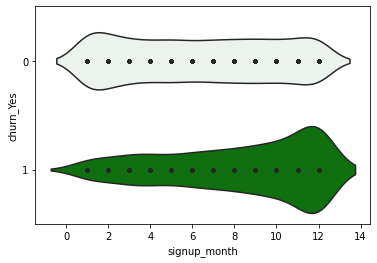

In [17]:
sns.violinplot(data=telco_train, x=telco_train.signup_month,y='churn_Yes',palette="light:g", inner="points", orient="h")

<AxesSubplot:xlabel='contract_type', ylabel='month'>

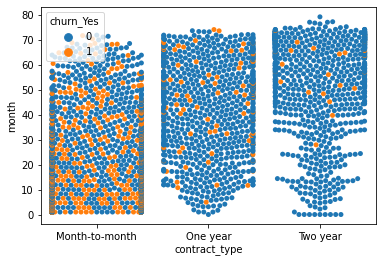

In [18]:
sns.swarmplot(data=telco_train, x="contract_type", y="month", hue="churn_Yes")

Answer 1: the customers who sign up the service in December has over 60% chance to churn within 1 month.

Question 2: Whether the features play significant role in December

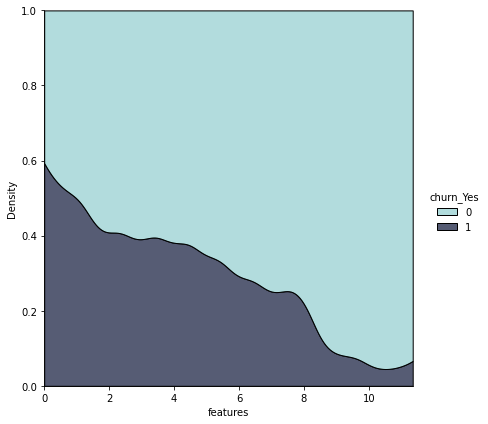

In [19]:
sns.displot(
    data=telco_train,
    x="features", hue="churn_Yes",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

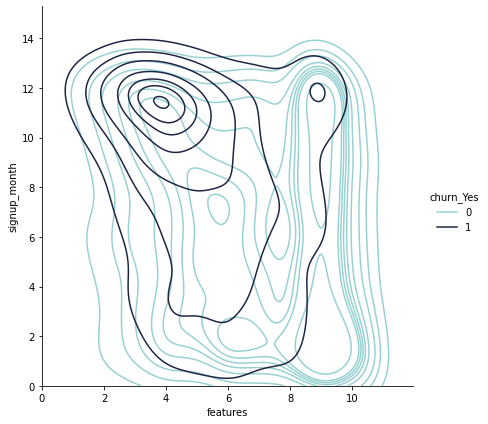

In [20]:
sns.displot(
    data=telco_train,
    x="features", y='signup_month',hue="churn_Yes",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

Answer 2: Customers are likely to leave the company when there are less than 5 features provided. And customers who sign up the service in December,with majority of them, are having less than 4 features.

Statistic Test

Question3: the monthly charges has significant impact on customers

In [21]:
# hypothesis
alpha=.05
# H0= The monthly charges has no impact on whether to churn
# Ha= The monthly charges has significant impact on whether to churn

In [22]:
monthly = telco_train[telco_train.churn_Yes==1].monthly_charges
churn = telco_train[telco_train.churn_Yes==0].monthly_charges

In [23]:
monthly.var(),churn.var()

(598.0876488484297, 969.1328213193171)

In [24]:
t, p = stats.ttest_ind(monthly,
                churn, 
                equal_var=False
               )

In [25]:
if p < alpha:
    print(f'The p-value is less than the alpha value, there for we can reject the H0')
else:
    print(f'The p-value is less than the alpha value, there for we cannot reject the H0')

The p-value is less than the alpha value, there for we can reject the H0


<AxesSubplot:xlabel='monthly_charges', ylabel='month'>

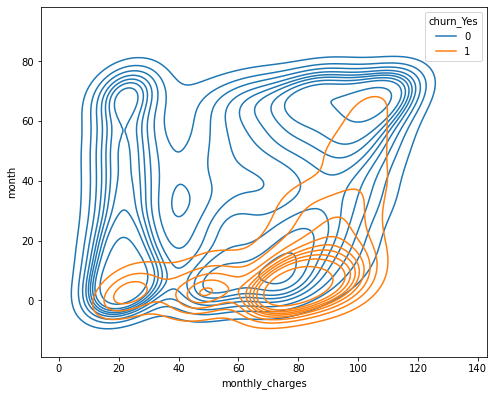

In [26]:
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw a contour plot to represent each bivariate density
sns.kdeplot(
    data=telco_train,
    x="monthly_charges",
    y="month",
    hue="churn_Yes",
    thresh=.1,
)

In [27]:
# conclusion
# since we reject the p-value, therefore, we can reasonably believe that the monthly charges has significant impact whether to churn

Answer 3: the monthly charges has significant on the churn rate and The customers are likely to stay in less than 20 month when the cost is between 60-100

Question 4: Whether the signup month has impact to the churn

In [28]:
# Ho=The signup month has no significant difference on the churn rate
# Ha=the signup month has significant difference on the churn rate

In [29]:
x=telco_train[telco_train.churn_Yes==1].signup_month
y=telco_train[telco_train.churn_Yes==0].signup_month
x.var(),y.var()

(12.38675381700088, 13.491875855773676)

In [30]:
tstat, pval = stats.ttest_ind(x, y, equal_var=False)
if pval < 0.05:
    print('we can reject the H0')
else:
    print('we cannot reject the H0')

we can reject the H0


<AxesSubplot:xlabel='signup_month', ylabel='Count'>

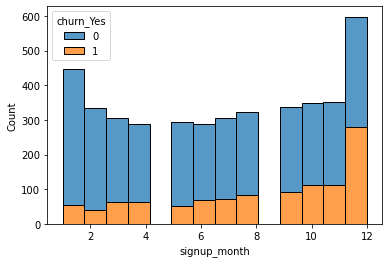

In [31]:
sns.histplot(data=telco_train, x='signup_month', hue='churn_Yes',multiple="stack")

answer 4: We cannot reject that there has no significant difference on what month the customer sign up the contract. Also the December has most significant increase on the churn rate.

## Exploration takeaway
The december is a month that has most people signing up, and people usually signed up with month to month contract. They will have over 60% chance to left the service after 1 month. Especially, when they signed up with less than 4 features. The monthly charges that is over $60 would also increase the chance of the customers to leave the company. However, the longer the customers stay, the less likely they are going to churn. It is likely that the customers are not fully aware of how many features they can added on to their service, so it has significan churn in less than one month. 
## Recommendation
In December, we can offer a 6 month contract with 1 month free (total 7 monthes) for the initial sign-up in order to encourage the customers to stay.
Customers are likely to churn within 1 month when they signup the month to month contract in December, we should provide them 1 month tryout on more than 5 features in order to encourage them to stay.

# Model and Evaluation

In [32]:
# create a baseline and determine its accuracy
telco_train.churn_Yes.mode()

0    0
Name: churn_Yes, dtype: uint8

In [33]:
# Split the data from train, validate, and test to x and y variables.
telco_x_train = telco_train.select_dtypes(exclude=['object']).drop(columns=['churn_Yes'])
telco_y_train = telco_train.select_dtypes(exclude=['object']).churn_Yes

telco_x_validate = telco_validate.select_dtypes(exclude=['object']).drop(columns=['churn_Yes'])
telco_y_validate = telco_validate.select_dtypes(exclude=['object']).churn_Yes

telco_x_test = telco_test.select_dtypes(exclude=['object']).drop(columns=['churn_Yes'])
telco_y_test = telco_test.select_dtypes(exclude=['object']).churn_Yes

In [34]:
# determine the baseline accuracy
baseline=(telco_y_train==0).mean()
print('The baseline accuracy is ',baseline)

The baseline accuracy is  0.7408284023668639


In [35]:
# Decision Tree Test

In [36]:
# set the max_depth to 3 and random state
# fit the training variable
clf_telco = DecisionTreeClassifier(max_depth=3, random_state=123)
clf_telco = clf_telco.fit(telco_x_train, telco_y_train)

[Text(0.5, 0.875, 'month <= 16.353\ngini = 0.384\nsamples = 4225\nvalue = [3130, 1095]'),
 Text(0.25, 0.625, 'monthly_charges <= 68.625\ngini = 0.497\nsamples = 1536\nvalue = [832, 704]'),
 Text(0.125, 0.375, 'features <= 4.5\ngini = 0.413\nsamples = 832\nvalue = [590, 242]'),
 Text(0.0625, 0.125, 'gini = 0.489\nsamples = 419\nvalue = [240, 179]'),
 Text(0.1875, 0.125, 'gini = 0.259\nsamples = 413\nvalue = [350, 63]'),
 Text(0.375, 0.375, 'paperless_billing_Yes <= 0.5\ngini = 0.451\nsamples = 704\nvalue = [242, 462]'),
 Text(0.3125, 0.125, 'gini = 0.496\nsamples = 155\nvalue = [84, 71]'),
 Text(0.4375, 0.125, 'gini = 0.41\nsamples = 549\nvalue = [158, 391]'),
 Text(0.75, 0.625, 'monthly_charges <= 73.8\ngini = 0.249\nsamples = 2689\nvalue = [2298, 391]'),
 Text(0.625, 0.375, 'features <= 5.5\ngini = 0.109\nsamples = 1281\nvalue = [1207, 74]'),
 Text(0.5625, 0.125, 'gini = 0.209\nsamples = 524\nvalue = [462, 62]'),
 Text(0.6875, 0.125, 'gini = 0.031\nsamples = 757\nvalue = [745, 12]'),


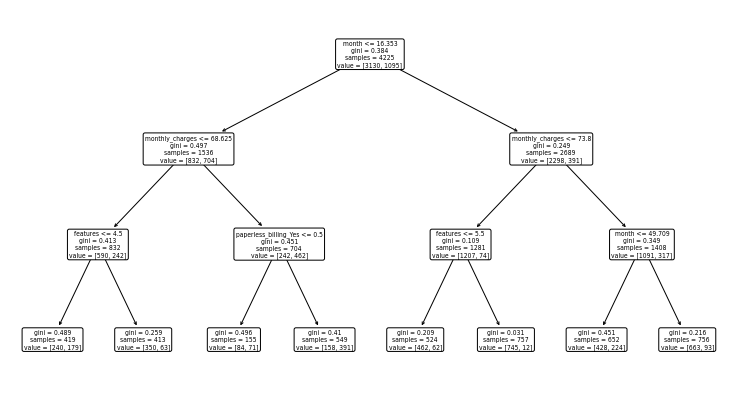

In [37]:
# plot the decision tree
plt.figure(figsize=(13, 7))
plot_tree(clf_telco, feature_names=telco_x_train.columns, rounded=True)

In [38]:
# put the model into the pandas dataframe
telco_y_pred = pd.DataFrame({'churn': telco_y_train,'baseline': 0, 'model_1':clf_telco.predict(telco_x_train)})
telco_y_pred

,churn,baseline,model_1
440,1,0,0
67,1,0,0
600,1,0,0
4883,0,0,0
1258,0,0,0
...,...,...,...
1794,0,0,0
817,0,0,0
901,0,0,0
1987,0,0,0


In [39]:
# evaluate the accuracy of the decision treee
print('Accuracy of Decision Tree model on training set: {:.2f}'
      .format(clf_telco.score(telco_x_train, telco_y_train)))

Accuracy of Decision Tree model on training set: 0.80


In [40]:
# we want to have classification report
print(classification_report(telco_y_pred.churn,telco_y_pred.model_1))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      3130
           1       0.71      0.36      0.48      1095

    accuracy                           0.80      4225
   macro avg       0.76      0.65      0.67      4225
weighted avg       0.78      0.80      0.77      4225



In [41]:
# we need confusion matrix to find out about the true false rate etc.
confusion_matrix(telco_y_pred.churn, telco_y_pred.model_1)

array([[2972,  158],
       [ 704,  391]])

In [42]:
# set the confusion matrix to create a data frame
pd.DataFrame(confusion_matrix(telco_y_pred.churn, telco_y_pred.model_1), index=['actual_notchurn','acutal_churn'], columns=['prep_notchurn','prep_churn'])

,prep_notchurn,prep_churn
actual_notchurn,2972,158
acutal_churn,704,391


In [43]:
# use those matrix value in confusion matrix to define the true negative ets.
telco_TN = 2972
telco_FP = 158
telco_FN = 704
telco_TP = 391

In [44]:
# calculate the base information
telco_all = telco_TP + telco_FP + telco_FN + telco_TN
telco_acc = (telco_TP + telco_TN) / telco_all

telco_TurePositiveRate = telco_recall = telco_TP/ (telco_TP + telco_FN)

telco_FalsePositiveRate = telco_FP / (telco_FP + telco_TN)

telco_TrueNegativeRate = telco_TN / (telco_TN + telco_FP)

telco_FalseNegativeRate = telco_FN / (telco_FN + telco_TP)

telco_precision = telco_TP / (telco_TP + telco_FP)

telco_f1_score = 2 * (telco_precision*telco_recall) / (telco_precision+telco_recall)

telco_support_pos = telco_TP + telco_FN
telco_support_neg = telco_FP + telco_TN

In [45]:
# and print a rough report for future evaluation
print('accuracy is:',telco_acc,'Ture Positive Rate is:',telco_TurePositiveRate,'False Positive Rate is:',telco_FalsePositiveRate,'/n',
      'True Negative Rate is:',telco_TrueNegativeRate,'False Negative Rate is:',telco_FalseNegativeRate,'precision is:',telco_precision,'/n',
      'f1_score is:',telco_f1_score,'support_pos is:',telco_support_pos,'support_neg is:',telco_support_neg)

accuracy is: 0.7959763313609467 Ture Positive Rate is: 0.35707762557077627 False Positive Rate is: 0.05047923322683706 /n True Negative Rate is: 0.949520766773163 False Negative Rate is: 0.6429223744292237 precision is: 0.7122040072859745 /n f1_score is: 0.4756690997566911 support_pos is: 1095 support_neg is: 3130


In [46]:
# Random Forest Test

In [47]:
# Random Forest Test with train dataset
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)
rf.fit(telco_x_train, telco_y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [48]:
# prediction
telco_y_predict=rf.predict(telco_x_train)

In [49]:
# reveal the accuracy and other information from classification report
print(classification_report(telco_y_train,telco_y_predict))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      3130
           1       0.88      0.73      0.80      1095

    accuracy                           0.90      4225
   macro avg       0.89      0.85      0.87      4225
weighted avg       0.90      0.90      0.90      4225



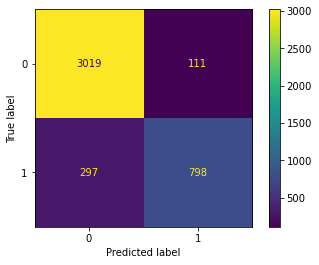

In [52]:
# create a confusion matrix to get confused
ConfusionMatrixDisplay(confusion_matrix(telco_y_train,telco_y_predict),display_labels=rf.classes_).plot()

In [53]:
# create a for loop to find out what is best max_depth to create a best model using random forest
for model in range (2,20):
    rf=RandomForestClassifier(max_depth=model, random_state=123)
    rf=rf.fit(telco_x_train,telco_y_train)
    y_predict=rf.predict(telco_x_train)
    print('model depth',model)
    print(classification_report(telco_y_train, telco_y_predict))

model depth 2
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      3130
           1       0.88      0.73      0.80      1095

    accuracy                           0.90      4225
   macro avg       0.89      0.85      0.87      4225
weighted avg       0.90      0.90      0.90      4225

model depth 3
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      3130
           1       0.88      0.73      0.80      1095

    accuracy                           0.90      4225
   macro avg       0.89      0.85      0.87      4225
weighted avg       0.90      0.90      0.90      4225

model depth 4
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      3130
           1       0.88      0.73      0.80      1095

    accuracy                           0.90      4225
   macro avg       0.89      0.85      0.87      4225
weighted avg       0.90      0.9

In [54]:
# compare the difference with validate data using similar method as last cell
model=[]
for num in range (2,20):
    rf=RandomForestClassifier(max_depth=num,random_state=123)
    rf=rf.fit(telco_x_train,telco_y_train)
    train_accuracy=rf.score(telco_x_train,telco_y_train)
    validate_accuracy=rf.score(telco_x_validate,telco_y_validate)
    result = {
        "max_depth": num,
        "train_accuracy": train_accuracy,
         "validate_accuracy": validate_accuracy
    }
    model.append(result)
test_validate = pd.DataFrame(model)
test_validate["difference"] = test_validate.train_accuracy - test_validate.validate_accuracy
test_validate

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.787456,0.757984,0.029471
1,3,0.799053,0.777857,0.021197
2,4,0.810178,0.782825,0.027353
3,5,0.813254,0.787083,0.026171
4,6,0.820592,0.783534,0.037057
5,7,0.834556,0.784244,0.050312
6,8,0.851124,0.778566,0.072558
7,9,0.877633,0.776437,0.101196
8,10,0.903432,0.775018,0.128414
9,11,0.935385,0.774308,0.161077


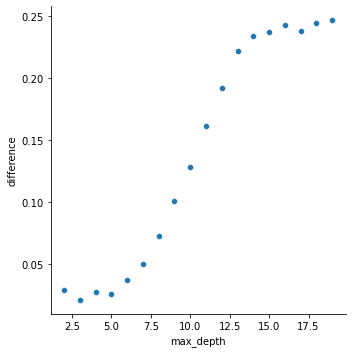

In [55]:
# visulized it
sns.relplot(x='max_depth',y='difference',data=test_validate)

## Key takeaway
max_depth=5 has best outcome

In [56]:
# KNN test

In [57]:
# classify and fit the model
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(telco_x_train, telco_y_train)

KNeighborsClassifier()

In [58]:
# predict the train and validate
y_pred= knn.predict(telco_x_train)
y_valid=knn.predict(telco_x_validate)

In [59]:
# the accuracy with the training
print('Accuracy of KNN model on training set: {:.2f}'
     .format(knn.score(telco_x_train, telco_y_train))),
print('Accuracy of KNN model on validate set: {:.2f}'
     .format(knn.score(telco_x_validate, telco_y_validate)))

Accuracy of KNN model on training set: 0.84
Accuracy of KNN model on validate set: 0.75


In [60]:
model=[]
for num in range (2,20):
    knn = KNeighborsClassifier(n_neighbors=num, weights='uniform')
    knn=knn.fit(telco_x_train, telco_y_train)
    train_accuracy=knn.score(telco_x_train,telco_y_train)
    validate_accuracy=knn.score(telco_x_validate,telco_y_validate)
    result = {
        "max_depth": num,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy,
    }
    model.append(result)
test_validate = pd.DataFrame(model)
test_validate["difference"] = test_validate.train_accuracy - test_validate.validate_accuracy
test_validate

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.866272,0.744500,0.121773
1,3,0.864379,0.733144,0.131235
2,4,0.838343,0.753016,0.085327
3,5,0.835030,0.751597,0.083433
4,6,0.822249,0.755855,0.066393
5,7,0.825089,0.757984,0.067104
6,8,0.818698,0.760823,0.057875
7,9,0.819408,0.768630,0.050778
8,10,0.811124,0.760114,0.051011
9,11,0.815385,0.765082,0.050303


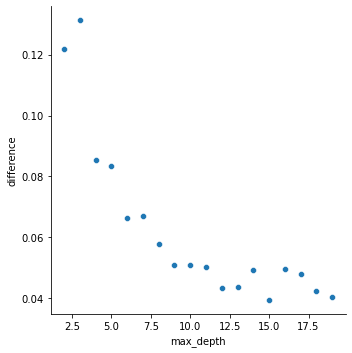

In [61]:
sns.relplot(x='max_depth',y='difference',data=test_validate)

##  Key takeaway
max_depth 15 has best outcome

# Create Predictions.csv

In [62]:
# use imported function to create the best models and compare them between methods
exp_mod.modeling(telco_x_train,telco_y_train,telco_x_validate,telco_y_validate)

LogisticRegression(random_state=123)
                           
train score: 
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      3130
           1       0.64      0.53      0.58      1095

    accuracy                           0.80      4225
   macro avg       0.74      0.71      0.72      4225
weighted avg       0.79      0.80      0.79      4225

val score: 
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1019
           1       0.64      0.48      0.55       390

    accuracy                           0.78      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409

                        
DecisionTreeClassifier(max_depth=3, random_state=123)
                           
train score: 
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      3130
           1       0.71  

(LogisticRegression(random_state=123),
 DecisionTreeClassifier(max_depth=3, random_state=123),
 RandomForestClassifier(max_depth=5, random_state=123),
 KNeighborsClassifier(n_neighbors=15))

In [64]:
# use the best method for our test dataset, and the accuracy is 78%
actual_test = telco_y_test
pred_test = log_model.predict(telco_x_test)
print(classification_report(actual_test, pred_test))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1025
           1       0.65      0.47      0.54       384

    accuracy                           0.78      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



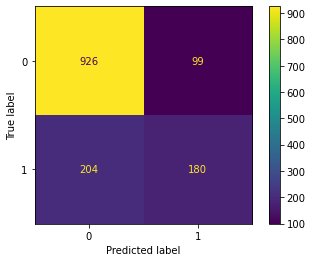

In [74]:
# create a confusion matrix
ConfusionMatrixDisplay(confusion_matrix(actual_test,pred_test),display_labels=rf.classes_).plot()

In [65]:
# predict the dataset with our random forest model
prob_test = rand_model.predict_proba(telco_x_test)

In [66]:
# create a probability dataframe
prob_df = pd.DataFrame(prob_test, columns=rand_model.classes_.tolist())
prob_df.head()

,0,1
0,0.452072,0.547928
1,0.684102,0.315898
2,0.979220,0.020780
3,0.864741,0.135259
4,0.930438,0.069562


In [67]:
# reset the indext
reset_test = telco_test.reset_index()
reset_test.head()

,index,customer_id,senior_citizen,tenure,monthly_charges,total_charges,contract_type,signup_date,partner_Yes,dependents_Yes,paperless_billing_Yes,churn_Yes,gender_Male,month,signup_month,features
0,941,4536-PLEQY,0,12,85.05,999.80,Month-to-month,2021-01-21 18:07:34,1,0,1,0,1,11.755438,1,5
1,1404,9921-QFQUL,0,23,90.15,2044.95,Month-to-month,2020-02-21 18:07:34,1,0,0,0,0,22.683860,2,6
2,5515,6485-QXWWE,0,62,26.00,1638.70,Two year,2016-11-21 18:07:34,0,1,0,0,0,63.026923,11,10
3,3684,6461-PPAXN,0,35,54.95,1916.00,One year,2019-02-21 18:07:34,1,1,1,0,0,34.868062,2,4
4,7017,5993-JSUWV,0,66,61.15,4017.45,Two year,2016-07-21 18:07:34,0,0,1,0,0,65.698283,7,5


In [68]:
# put two dataframe together
test_prob_df = pd.concat([reset_test, prob_df], axis=1)
test_prob_df.head()

,index,customer_id,senior_citizen,tenure,monthly_charges,total_charges,contract_type,signup_date,partner_Yes,dependents_Yes,paperless_billing_Yes,churn_Yes,gender_Male,month,signup_month,features,0,1
0,941,4536-PLEQY,0,12,85.05,999.80,Month-to-month,2021-01-21 18:07:34,1,0,1,0,1,11.755438,1,5,0.452072,0.547928
1,1404,9921-QFQUL,0,23,90.15,2044.95,Month-to-month,2020-02-21 18:07:34,1,0,0,0,0,22.683860,2,6,0.684102,0.315898
2,5515,6485-QXWWE,0,62,26.00,1638.70,Two year,2016-11-21 18:07:34,0,1,0,0,0,63.026923,11,10,0.979220,0.020780
3,3684,6461-PPAXN,0,35,54.95,1916.00,One year,2019-02-21 18:07:34,1,1,1,0,0,34.868062,2,4,0.864741,0.135259
4,7017,5993-JSUWV,0,66,61.15,4017.45,Two year,2016-07-21 18:07:34,0,0,1,0,0,65.698283,7,5,0.930438,0.069562


In [69]:
# use the propability result to create a column call predicted
test_prob_df['predicted'] = pred_test
test_prob_df.head()

,index,customer_id,senior_citizen,tenure,monthly_charges,total_charges,contract_type,signup_date,partner_Yes,dependents_Yes,paperless_billing_Yes,churn_Yes,gender_Male,month,signup_month,features,0,1,predicted
0,941,4536-PLEQY,0,12,85.05,999.80,Month-to-month,2021-01-21 18:07:34,1,0,1,0,1,11.755438,1,5,0.452072,0.547928,1
1,1404,9921-QFQUL,0,23,90.15,2044.95,Month-to-month,2020-02-21 18:07:34,1,0,0,0,0,22.683860,2,6,0.684102,0.315898,0
2,5515,6485-QXWWE,0,62,26.00,1638.70,Two year,2016-11-21 18:07:34,0,1,0,0,0,63.026923,11,10,0.979220,0.020780,0
3,3684,6461-PPAXN,0,35,54.95,1916.00,One year,2019-02-21 18:07:34,1,1,1,0,0,34.868062,2,4,0.864741,0.135259,0
4,7017,5993-JSUWV,0,66,61.15,4017.45,Two year,2016-07-21 18:07:34,0,0,1,0,0,65.698283,7,5,0.930438,0.069562,0


In [70]:
# retrive columns of interest
csv_df = test_prob_df[['churn_Yes', 'customer_id','predicted']]
csv_df

,churn_Yes,customer_id,predicted
0,0,4536-PLEQY,1
1,0,9921-QFQUL,0
2,0,6485-QXWWE,0
3,0,6461-PPAXN,0
4,0,5993-JSUWV,0
...,...,...,...
1404,1,4817-VYYWS,0
1405,0,1465-LNTLJ,1
1406,0,5537-UXXVS,0
1407,0,9670-BPNXF,0


In [71]:
# create a predictions.csv in local drive
csv_df.to_csv('predictions.csv')